# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [1]:
df.head()

NameError: name 'df' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualizations

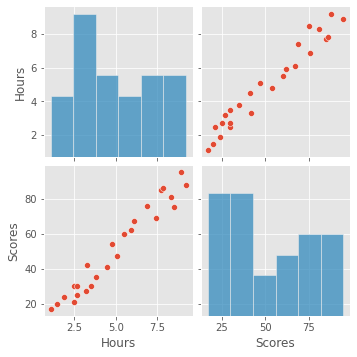

In [6]:
sns.pairplot(df)

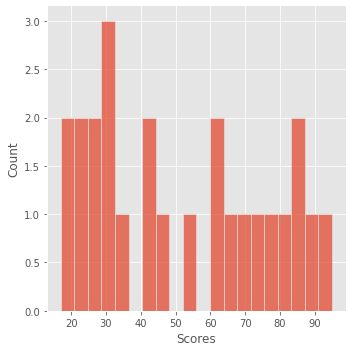

In [7]:
sns.displot(data=df, x="Scores", bins=20)

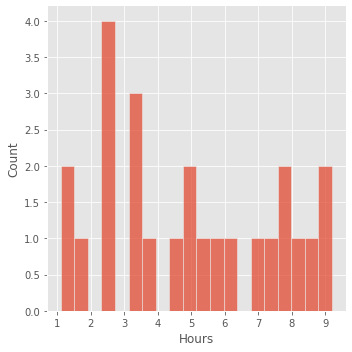

In [8]:
sns.displot(data=df, x='Hours',bins=20)

<AxesSubplot:>

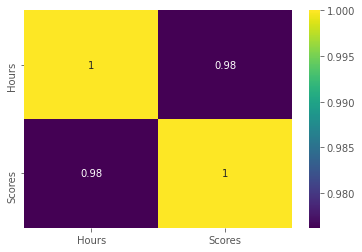

In [9]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

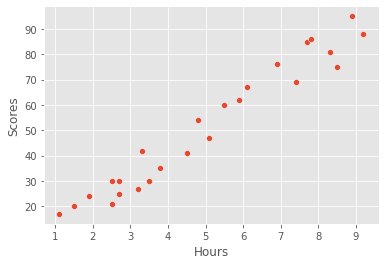

In [10]:
sns.scatterplot(data=df, x="Hours", y="Scores")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

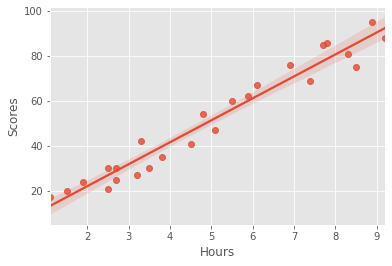

In [11]:
sns.regplot(data=df, x="Hours", y="Scores")

## We can use np.polyfit for simple regression instead of using sklearn, use help(np.polyfit) for more
## Basically this method accepts x,y and degreee of model trying to fit and returns the coefficients (highest order first)

In [12]:
x = df['Hours']
y = df['Scores']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
#help(np.polyfit)

In [15]:
np.polyfit(x_train,y_train,1)

array([9.96651548, 2.10249307])

In [16]:
def linear_model(future_hours):
    return 9.92254902* future_hours + 1.42598039

In [17]:
future_hours = np.linspace(0,10,100)
future_scores = linear_model(future_hours)

## This is our Predicted Linear Regression Model

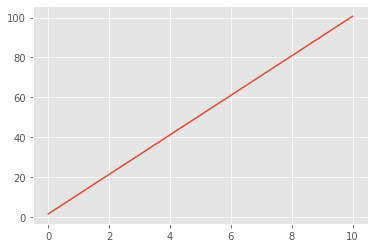

In [18]:
plt.plot(future_hours,future_scores)

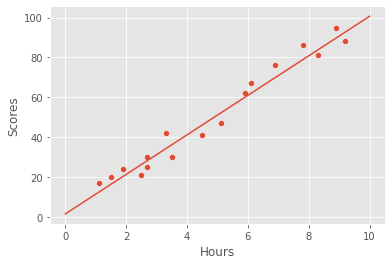

In [19]:
plt.plot(future_hours,future_scores)
sns.scatterplot(x=x_train, y=y_train)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Performance Metrics

In [20]:
predictions = x_test.apply(linear_model)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(y_test, predictions)
mae

5.851764706000001

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

6.240077282124798